In [1]:
pip install tensorflow

  Using cached tensorflow-2.8.0-cp38-cp38-macosx_10_14_x86_64.whl (217.4 MB)
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [78]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
(X_train, Y_train), (X_test, y_test) =datasets.cifar10.load_data()

170508288/170498071 [==============================] - 41s 0us/step


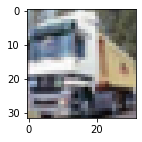

In [8]:
#lets check training samples 
plt.figure(figsize = (15,2)) #make image smaller
plt.imshow(X_train[1])

In [16]:
#lets help label our images 
Y_train = Y_train.reshape(-1,)
classes = ["airplane", "automobile", "bird", "cat","deer","dog", "frog", "horse","ship","truck"]

In [17]:
#lets create a quick function to plot these images 
def plot_image(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])
    
    

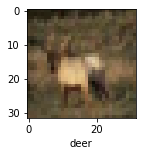

In [20]:
plot_image(X_train,Y_train,3)

In [21]:
#we are now able to classify many images 

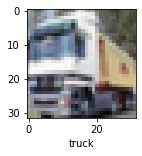

In [22]:
plot_image(X_train,Y_train,1)

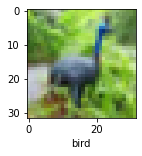

In [23]:
plot_image(X_train,Y_train,6)

In [24]:
#lets try to make our image a bit clearer by normalizing data 
X_train = X_train /255
X_test = X_test/255

In [49]:
#lets build a neural network 
#since our data is not categorical we use sparse cross entropy 
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
    
])

In [50]:
cnn.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])


In [51]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4405 - accuracy: 0.4814
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0986 - accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9674 - accuracy: 0.6637
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8802 - accuracy: 0.6933
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8111 - accuracy: 0.7182
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7524 - accuracy: 0.7384
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7059 - accuracy: 0.7544
Epoch 8/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6594 - accuracy: 0.7686
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6164 - accuracy: 0.7831
Epoch 10/10
1563/1563 [==============================] - 21s 14m

In [52]:
#time to test our test set
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9089 - accuracy: 0.7086


[0.9088751077651978, 0.7085999846458435]

In [53]:
#we have a 70% accuracy, with more epochs we can increase this accuracy 
#however for now we will stick with 10 epochs

In [54]:
y_test = y_test.reshape(-1)


In [55]:
y_pred = cnn.predict(X_test)

In [56]:
y_classes = [np.argmax(element) for element in y_pred]

In [57]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

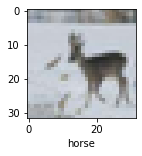

In [70]:
plot_image(X_test,y_test,20)

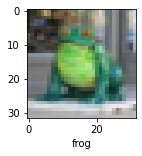

In [74]:
plot_image(X_test,y_test,19)

In [69]:
#we see that the images are only 70% accurrate

In [79]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.81      0.81      0.81      1000
           2       0.65      0.58      0.61      1000
           3       0.54      0.46      0.49      1000
           4       0.67      0.66      0.67      1000
           5       0.56      0.70      0.62      1000
           6       0.79      0.75      0.77      1000
           7       0.77      0.73      0.75      1000
           8       0.82      0.82      0.82      1000
           9       0.73      0.84      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

